In [1]:
from collections import defaultdict, Counter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Report mismatch ratio and nascent RNA for celltypes

In [2]:
tmp = pd.read_csv("results/seurat_transcripts/metadata_and_celltype.consistent_celltype.tsv", sep="\t")
cell2type = dict()
for cell, ct in tmp[["Cell", "CellType"]].values:
    cell2type[cell] = ct

In [3]:
d = pd.read_excel("../../1_NanoNASCseq/data/NanoNASCseq_summary_selected.xls")
d = d[d["UMIs"] >= 5000]
d["CellType"] = [cell2type.get(cell) for cell in d["Cell"]]
d = d[(d["Species"] == "Mouse") & (d["Strain"] != "mESC")]
print(len(d))

2778


In [4]:
Counter(d["CellType"])

Counter({None: 1063,
         'Conflict': 243,
         'TE-1': 74,
         'ICM-1': 125,
         'TE-2': 155,
         'ICM-2': 356,
         'EPI': 289,
         'polarTE': 116,
         'PE': 186,
         'muralTE': 171})

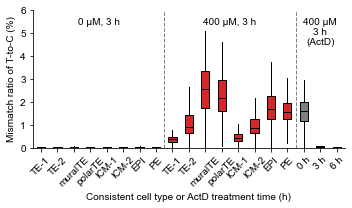

In [5]:
cts = ['TE-1', 'TE-2', 'muralTE', 'polarTE', 'ICM-1', "ICM-2", "EPI", "PE"]

plt.figure(figsize=(5, 3))
array = []
for ct in cts:
    vs = d[(d["Time"] == 3) & (d["s4U"] == 0) & (d["ActD"].isna()) & (d["CellType"] == ct)]["TCRatio"] * 100
    array.append(vs)
for ct in cts:
    vs = d[(d["Time"] == 3) & (d["s4U"] == 400) & (d["ActD"].isna()) & (d["CellType"] == ct)]["TCRatio"] * 100
    array.append(vs)
for actd in [0, 3, 6]:
    vs = d[(d["Time"] == 3) & (d["s4U"] == 400) & (d["ActD"] == actd)]["TCRatio"] * 100
    array.append(vs)

ylim = 6
w = 0.5
xs = np.arange(len(cts) * 2 + 3)
xticks = cts * 2 + ["0 h", "3 h", "6 h"]
plt.boxplot(array[:len(cts)], positions=xs[:len(cts)], widths=w, showfliers=False, showcaps=False, 
            patch_artist=True, boxprops={"facecolor": "C7"}, 
            medianprops={"color": "black"})
plt.boxplot(array[len(cts):-3], positions=xs[len(cts):-3], widths=w, showfliers=False, showcaps=False, 
            patch_artist=True, boxprops={"facecolor": "C3"}, 
            medianprops={"color": "black"})
plt.boxplot(array[-3:], positions=xs[-3:], widths=w, showfliers=False, showcaps=False, 
            patch_artist=True, boxprops={"facecolor": "C7"}, 
            medianprops={"color": "black"})
plt.xticks(xs, xticks, rotation=45)
plt.axvline(7.5, lw=1, ls="--", color="grey")
plt.axvline(15.5, lw=1, ls="--", color="grey")
plt.text(3.5, ylim * 0.95, "0 μM, 3 h", ha="center", va="top")
plt.text(11.5, ylim * 0.95, "400 μM, 3 h", ha="center", va="top")
plt.text(17, ylim * 0.95, "400 μM\n3 h\n(ActD)", ha="center", va="top")
plt.xlabel("Consistent cell type or ActD treatment time (h)")
plt.ylim(0, ylim)
plt.ylabel("Mismatch ratio of T-to-C (%)")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.tight_layout()
plt.savefig("figures/mismatch_ratio_for_celltype.pdf", dpi=300)

In [6]:
[len(vs) for vs in array]

[3, 7, 21, 14, 5, 21, 16, 12, 70, 145, 105, 84, 105, 332, 211, 139, 34, 36, 28]

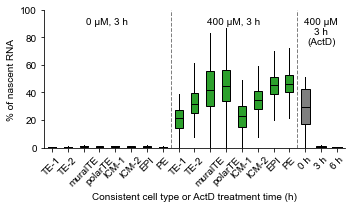

In [7]:
cts = ['TE-1', 'TE-2', 'muralTE', 'polarTE', 'ICM-1', "ICM-2", "EPI", "PE"]

plt.figure(figsize=(5, 3))
array = []
for ct in cts:
    vs = d[(d["Time"] == 3) & (d["s4U"] == 0) & (d["CellType"] == ct)]["NascentRatio2"] * 100
    array.append(vs)
for ct in cts:
    vs = d[(d["Time"] == 3) & (d["s4U"] == 400) & (d["CellType"] == ct)]["NascentRatio2"] * 100
    array.append(vs)
for actd in [0, 3, 6]:
    vs = d[d["ActD"] == actd]["NascentRatio2"] * 100
    array.append(vs)

ylim = 100
w = 0.5
xs = np.arange(len(cts) * 2 + 3)
xticks = cts * 2 + ["0 h", "3 h", "6 h"]
plt.boxplot(array[:len(cts)], positions=xs[:len(cts)], widths=w, showfliers=False, showcaps=False, 
            patch_artist=True, boxprops={"facecolor": "C7"}, 
            medianprops={"color": "black"})
plt.boxplot(array[len(cts):-3], positions=xs[len(cts):-3], widths=w, showfliers=False, showcaps=False, 
            patch_artist=True, boxprops={"facecolor": "C2"}, 
            medianprops={"color": "black"})
plt.boxplot(array[-3:], positions=xs[-3:], widths=0.6, showfliers=False, showcaps=False,
            patch_artist=True, boxprops={"facecolor": "C7"}, 
            medianprops={"color": "black"})
plt.xticks(xs, xticks, rotation=45)
plt.axvline(7.5, lw=1, ls="--", color="grey")
plt.axvline(15.5, lw=1, ls="--", color="grey")
plt.text(3.5, ylim * 0.95, "0 μM, 3 h", ha="center", va="top")
plt.text(11.5, ylim * 0.95, "400 μM, 3 h", ha="center", va="top")
plt.text(17, ylim * 0.95, "400 μM\n3 h\n(ActD)", ha="center", va="top")
plt.xlabel("Consistent cell type or ActD treatment time (h)")
plt.ylim(0, ylim)
plt.ylabel("% of nascent RNA")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.tight_layout()    
plt.savefig("figures/nascent_umi_ratio_for_celltype.pdf", dpi=300)

In [8]:
[len(vs) for vs in array]

[3, 9, 21, 14, 5, 23, 16, 12, 70, 146, 113, 91, 107, 333, 238, 152, 46, 38, 29]